In [54]:
import numpy as np
import pandas as pd
import multiprocessing
import time
import pickle
import glob

In [61]:
import importlib
import graph
importlib.reload(graph)
from graph import UndirectedGraph, WeightedEdge, Node

In [8]:
hourly_graphs_dir = "hourly_graphs"

graphs_paths = glob.glob(f"{hourly_graphs_dir}/hourly_graph_*.pickle")

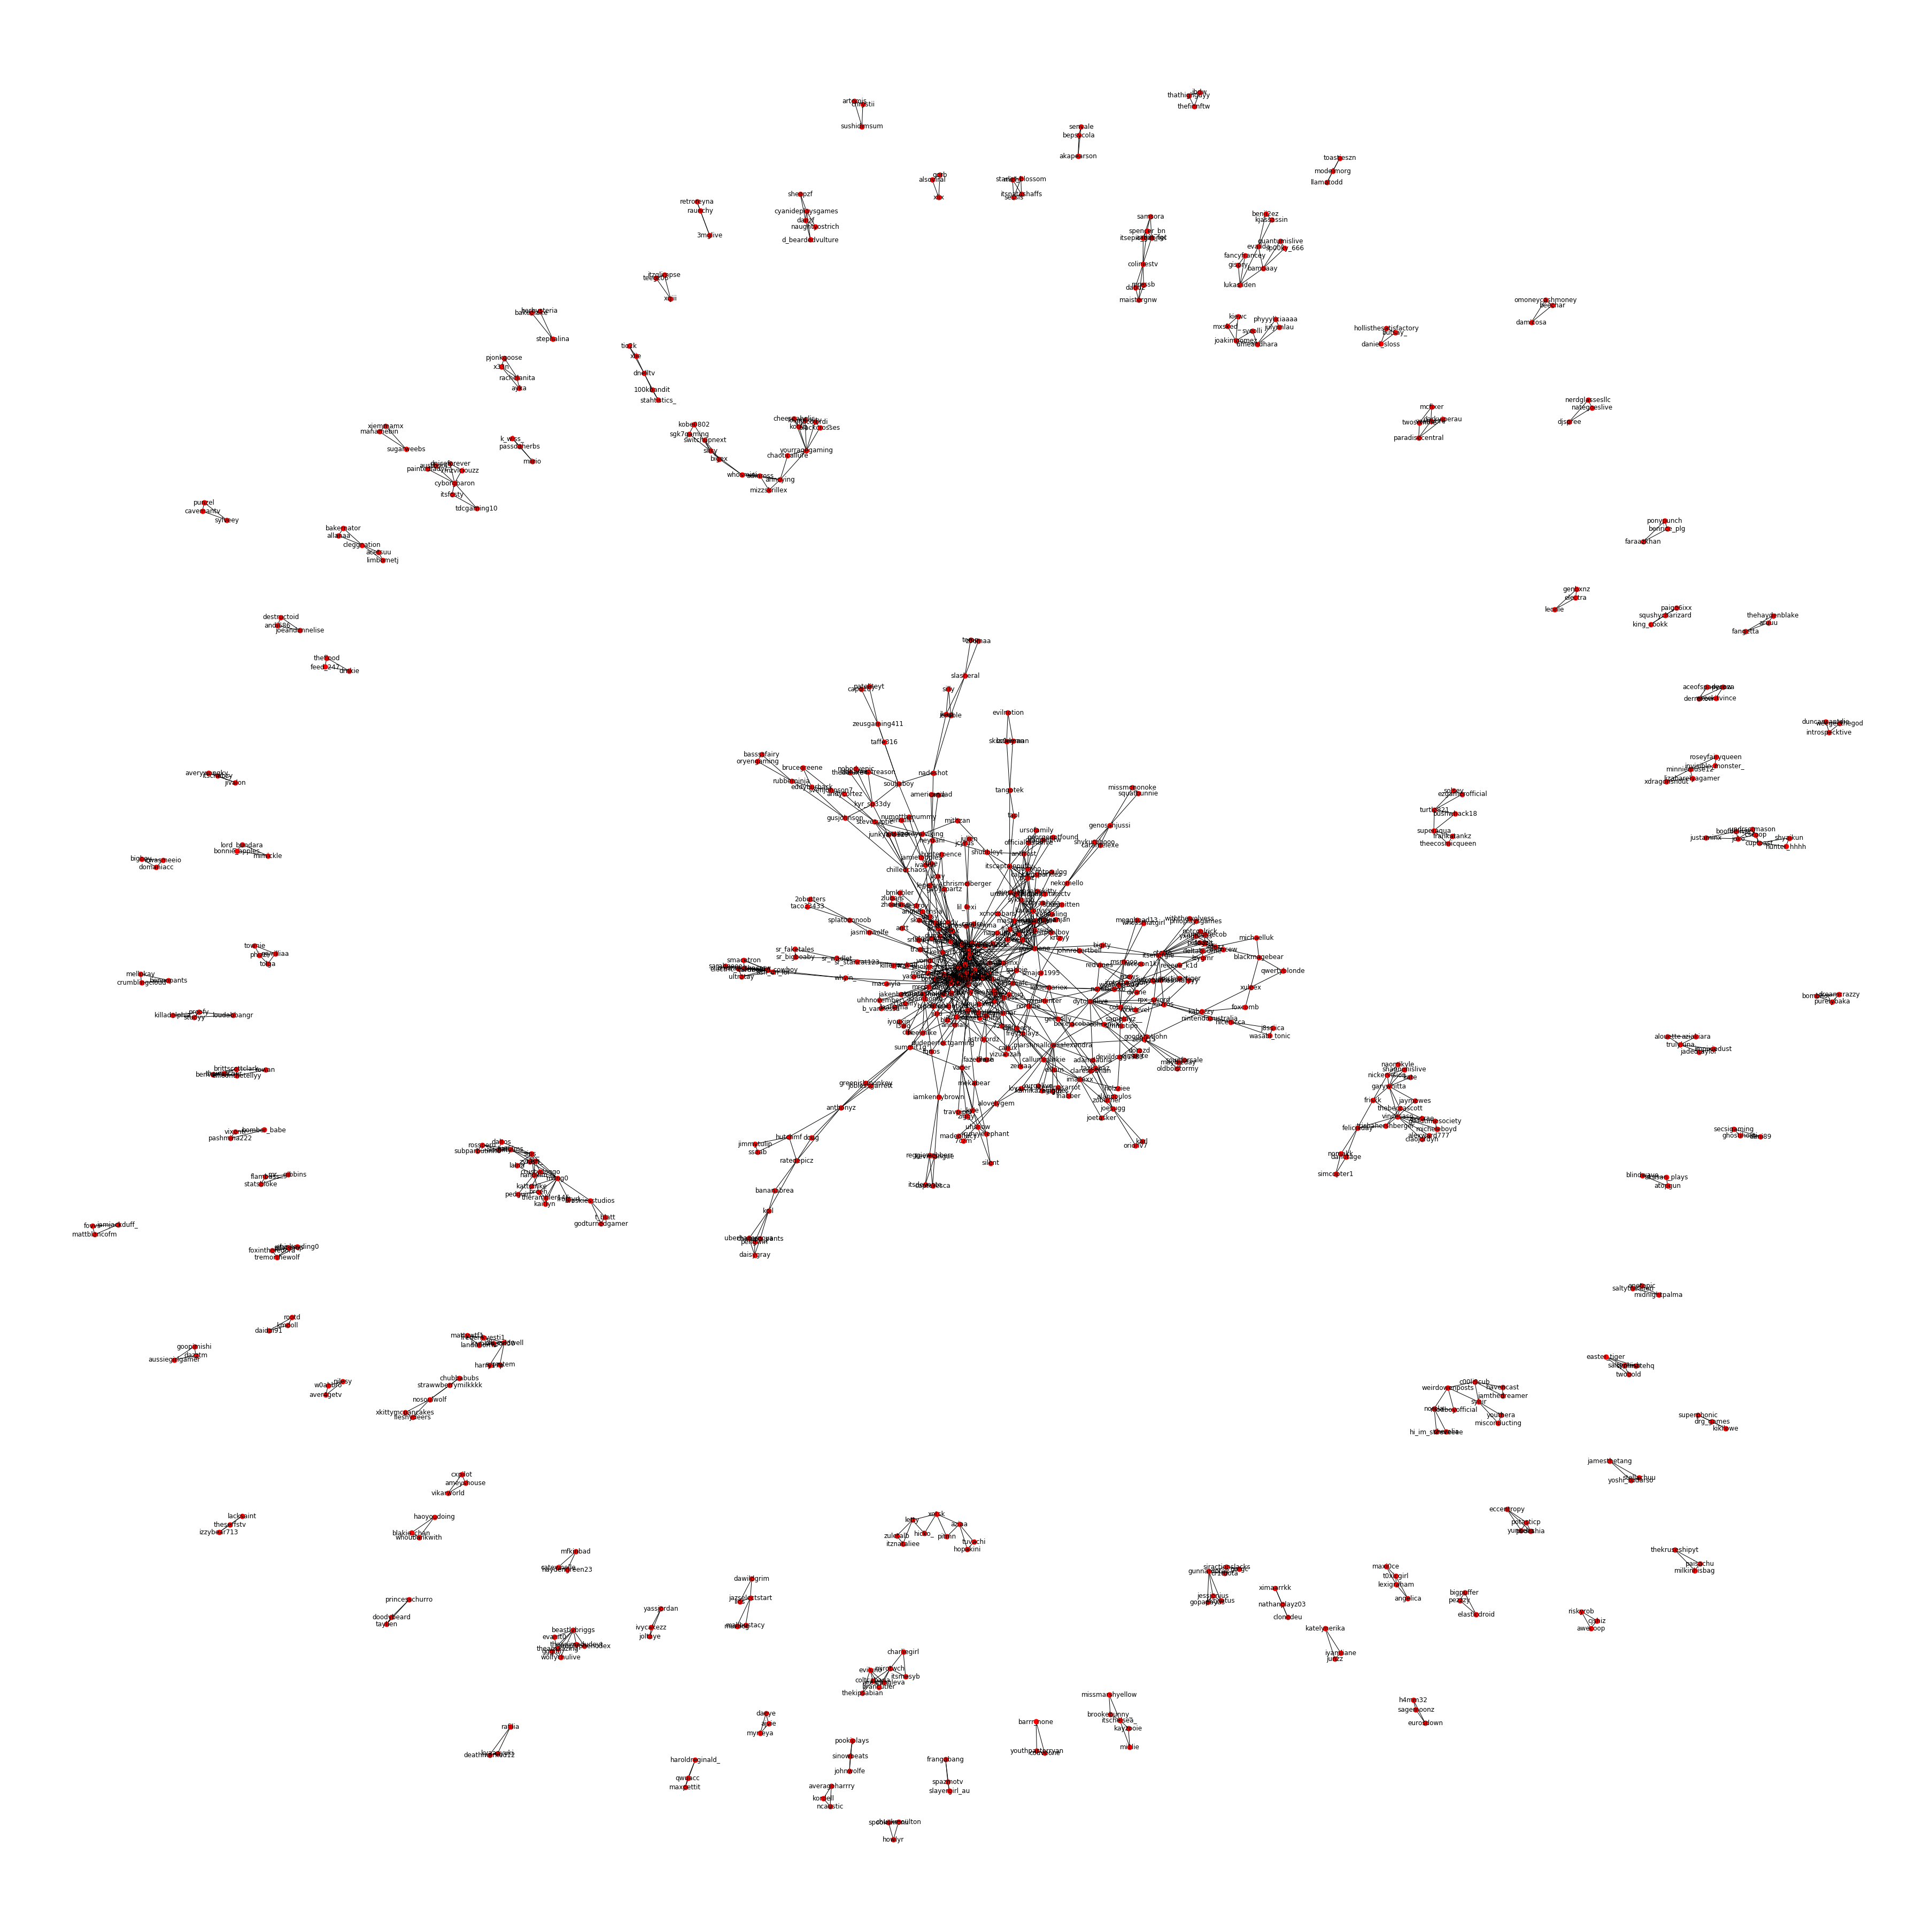

In [28]:
combined_graph = UndirectedGraph()

for graphs_path in graphs_paths:
    graphs = pickle.load(open(graphs_path, "rb"))
    for graph in graphs:
        if len(graph.nodes) <= 2:
            continue
        for edge in graph.edges():
            for node_id in edge.nodes:
                if node_id not in combined_graph.nodes:
                    combined_graph.add_node(Node(node_id))
            if edge.nodes[0] not in combined_graph.nodes[edge.nodes[1]].edges:
                combined_graph.add_edge(WeightedEdge(edge.nodes, 1))
            combined_graph.nodes[edge.nodes[0]].edges[edge.nodes[1]].weight += 1

combined_graph.plot()

## KST

In [29]:
mst = combined_graph.maximum_spanning_tree()

0 / 1345
1 / 1345
2 / 1345
3 / 1345
4 / 1345
5 / 1345
6 / 1345
7 / 1345
8 / 1345
9 / 1345
10 / 1345
11 / 1345
12 / 1345
13 / 1345
14 / 1345
15 / 1345
16 / 1345
17 / 1345
18 / 1345
19 / 1345
20 / 1345
21 / 1345
22 / 1345
23 / 1345
24 / 1345
25 / 1345
26 / 1345
27 / 1345
28 / 1345
29 / 1345
30 / 1345
31 / 1345
32 / 1345
33 / 1345
34 / 1345
35 / 1345
36 / 1345
37 / 1345
38 / 1345
39 / 1345
40 / 1345
41 / 1345
42 / 1345
43 / 1345
44 / 1345
45 / 1345
46 / 1345
47 / 1345
48 / 1345
49 / 1345
50 / 1345
51 / 1345
52 / 1345
53 / 1345
54 / 1345
55 / 1345
56 / 1345
57 / 1345
58 / 1345
59 / 1345
60 / 1345
61 / 1345
62 / 1345
63 / 1345
64 / 1345
65 / 1345
66 / 1345
67 / 1345
68 / 1345
69 / 1345
70 / 1345
71 / 1345
72 / 1345
73 / 1345
74 / 1345
75 / 1345
76 / 1345
77 / 1345
78 / 1345
79 / 1345
80 / 1345
81 / 1345
82 / 1345
83 / 1345
84 / 1345
85 / 1345
86 / 1345
87 / 1345
88 / 1345
89 / 1345
90 / 1345
91 / 1345
92 / 1345
93 / 1345
94 / 1345
95 / 1345
96 / 1345
97 / 1345
98 / 1345
99 / 1345
100 / 1345

In [30]:
def k_spanning_tree(st, k):
    edges = st.edges()
    edges.sort(key=lambda edge: edge.weight)
    for i in range(k):
        st.remove_edge(edges[i].nodes)
    return st

In [31]:
k_st = mst.copy()
k = 1
while True:
    k_st = k_spanning_tree(k_st, 1)
    groups = [group for group in k_st.disconnected_groups() if len(group) > 4]
    average_group_size = np.average([len(group) for group in groups])
    print(
        f"k: {k}, average group size: "
        f"{average_group_size}, "
        f"group count: {len(groups)}"
    )
    if average_group_size < 30:
        break
    k += 1

k: 1, average group size: 20.192307692307693, group count: 26


In [37]:
k_st = mst.copy()
while True:
    k_st = k_spanning_tree(k_st, 1)
    groups = [group for group in k_st.disconnected_groups() if len(group) > 4]
    average_group_size = np.average([len(group) for group in groups])
    print(
        f"k: {k}, average group size: "
        f"{average_group_size}, "
        f"group count: {len(groups)}"
    )
    
    train_group = [group for group in k_st.disconnected_groups() if "trainwreckstv" in group][0]
    print(train_group)
    print()
    
    if len(train_group) < 20:
        break
    

k: 499, average group size: 20.115384615384617, group count: 26
{'squatbunnie', 'easyrod', 'heydani', 'neytiri', 'mamajaan', 'vgumiho', 'tinakitten', 'fuslie', 'koil', 'callummarkie', 'anomaly', 'vikramafc', 'cardboard_cowboy', 'xuleex', 'bigity', 'notpaulgg', 'bmkibler', 'nekomello', 'deansocool', 'brucegreene', 'cobymj', 'snappy', 'taco33433', 'oldboistormy', 'yetiapocalypse', 'skizzleman', 'junkyard129', 'hispanictitanictv', 'megghead13', 'iamkennybrown', 'fresh', 'jaketwiinsane', 'macaiyla', 'itsenergie', 'zerkaa', 'harambe', 'shubbleyt', 'thump', 'vondilltv', 'xchocobars', 'enable', 'smacetron', 'iyouxin', 'caramelexe', 'evilnotion', 'jakenbakelive', 'classify', 'bekejacoba', 'blackmagebear', 'petaaz_', 'dadexo', 'reeeee_k1d', 'xqcow', 'masayoshi', 'wasabekitty', 'gusjohnson', 'silly', 'mithzan', 'demisux', 'anthonyz', 'sr_faketales', 'greenishmonkey', 'redvines', 'laurenzside', 'splatoonnoob', 'killerjwa', 'jkap', 'vizualizah', 'steelingcarrot', 'taffe316', 'smilozgames', 'johnro

k: 499, average group size: 19.416666666666668, group count: 24
{'temp', 'gabyspartz', 'squatbunnie', 'lizbeans', 'tangotek', 'easyrod', 'alovelygem', 'whyin_', 'legenvd', 'madeoflucy', 'm0xyy', 'heydani', 'fqnos', 'jamietopples', 'neytiri', 'mamajaan', 'dogbit_', 'imtommygun', 'ototto', 'trainwreckstv', 'woahderbud', 'fuslie', 'callummarkie', 'sr_wadlet', 'vgumiho', 'tinakitten', 'vader', 'b_vannessa', 'boxbox', 'anomaly', 'krtzyy', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'anniefuchsia', 'cardboard_cowboy', 'dudeperfectgaming', 'kyr_sp33dy', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'svenjohnson7', 'summit1g', 'bigity', 'myjanjan', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'maybieday', 'karacorvus', 'ultratay', 'bmkibler', 'nekomello', 'phokingtv_', 'honk', 'calfreezy', 'oohremix', 'notpaulgg', 'tfue', 'blizy', 'mezzarthy', 'zeusgaming411', 'lil_lexi', 'sr_bigboaby', 'ariasaki', 'shykurobooo', 'harrie', 'smajor1995', 'natehill', 'lexiemariex'

{'temp', 'gabyspartz', 'squatbunnie', 'lizbeans', 'tangotek', 'easyrod', 'alovelygem', 'whyin_', 'legenvd', 'madeoflucy', 'm0xyy', 'heydani', 'fqnos', 'jamietopples', 'neytiri', 'mamajaan', 'dogbit_', 'imtommygun', 'ototto', 'trainwreckstv', 'woahderbud', 'fuslie', 'callummarkie', 'sr_wadlet', 'vgumiho', 'tinakitten', 'vader', 'b_vannessa', 'boxbox', 'anomaly', 'krtzyy', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'cardboard_cowboy', 'dudeperfectgaming', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'myjanjan', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'maybieday', 'karacorvus', 'ultratay', 'bmkibler', 'nekomello', 'phokingtv_', 'honk', 'calfreezy', 'oohremix', 'notpaulgg', 'tfue', 'blizy', 'mezzarthy', 'zeusgaming411', 'lil_lexi', 'sr_bigboaby', 'ariasaki', 'shykurobooo', 'harrie', 'smajor1995', 'natehill', 'lexiemariex', 'deansocool', 'draskyl', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', '2obutters', 'joesugg', 'cobymj',

{'temp', 'gabyspartz', 'squatbunnie', 'tangotek', 'easyrod', 'alovelygem', 'whyin_', 'legenvd', 'madeoflucy', 'm0xyy', 'heydani', 'fqnos', 'jamietopples', 'neytiri', 'mamajaan', 'dogbit_', 'imtommygun', 'ototto', 'trainwreckstv', 'woahderbud', 'fuslie', 'sr_wadlet', 'vgumiho', 'tinakitten', 'b_vannessa', 'missmononoke', 'boxbox', 'krtzyy', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'cardboard_cowboy', 'dudeperfectgaming', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'myjanjan', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'maybieday', 'karacorvus', 'ultratay', 'bmkibler', 'nekomello', 'phokingtv_', 'honk', 'calfreezy', 'oohremix', 'notpaulgg', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'sr_bigboaby', 'ariasaki', 'shykurobooo', 'harrie', 'smajor1995', 'natehill', 'lexiemariex', 'deansocool', 'draskyl', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'cobymj', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', '

{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'alovelygem', 'whyin_', 'legenvd', 'madeoflucy', 'm0xyy', 'heydani', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'dogbit_', 'imtommygun', 'ototto', 'trainwreckstv', 'woahderbud', 'fuslie', 'sr_wadlet', 'tinakitten', 'b_vannessa', 'boxbox', 'krtzyy', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'cardboard_cowboy', 'dudeperfectgaming', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'myjanjan', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'maybieday', 'karacorvus', 'ultratay', 'bmkibler', 'phokingtv_', 'honk', 'calfreezy', 'oohremix', 'notpaulgg', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'sr_bigboaby', 'ariasaki', 'harrie', 'smajor1995', 'natehill', 'lexiemariex', 'deansocool', 'draskyl', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'cobymj', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'msmooo', 'notcoolrick', 'yazzybug', 'callux', 'qwertyblo

k: 499, average group size: 16.82608695652174, group count: 23
{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'alovelygem', 'whyin_', 'legenvd', 'madeoflucy', 'heydani', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'dogbit_', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'b_vannessa', 'boxbox', 'krtzyy', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'cardboard_cowboy', 'dudeperfectgaming', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'karacorvus', 'ultratay', 'bmkibler', 'phokingtv_', 'honk', 'calfreezy', 'oohremix', 'notpaulgg', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'smajor1995', 'natehill', 'lexiemariex', 'deansocool', 'draskyl', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'callux', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyo

{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'whyin_', 'legenvd', 'fqnos', 'heydani', 'jamietopples', 'neytiri', 'vgumiho', 'dogbit_', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'b_vannessa', 'boxbox', 'krtzyy', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'cardboard_cowboy', 'dudeperfectgaming', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'karacorvus', 'ultratay', 'bmkibler', 'phokingtv_', 'honk', 'calfreezy', 'notpaulgg', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'smajor1995', 'natehill', 'lexiemariex', 'deansocool', 'draskyl', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'callux', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'skizzleman', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', '

k: 499, average group size: 15.782608695652174, group count: 23
{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'whyin_', 'legenvd', 'fqnos', 'heydani', 'jamietopples', 'neytiri', 'vgumiho', 'dogbit_', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'krtzyy', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'cardboard_cowboy', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'karacorvus', 'ultratay', 'bmkibler', 'phokingtv_', 'honk', 'calfreezy', 'notpaulgg', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'smajor1995', 'natehill', 'lexiemariex', 'deansocool', 'draskyl', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'callux', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'skizzleman', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool

k: 499, average group size: 15.590909090909092, group count: 22
{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'whyin_', 'legenvd', 'fqnos', 'heydani', 'jamietopples', 'neytiri', 'vgumiho', 'dogbit_', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'krtzyy', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'cardboard_cowboy', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'karacorvus', 'ultratay', 'bmkibler', 'phokingtv_', 'honk', 'calfreezy', 'notpaulgg', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'smajor1995', 'lexiemariex', 'deansocool', 'draskyl', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'skizzleman', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'talia

{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'whyin_', 'legenvd', 'fqnos', 'heydani', 'jamietopples', 'neytiri', 'vgumiho', 'dogbit_', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'krtzyy', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'cardboard_cowboy', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'karacorvus', 'ultratay', 'bmkibler', 'phokingtv_', 'honk', 'calfreezy', 'notpaulgg', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'smajor1995', 'lexiemariex', 'deansocool', 'draskyl', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'michaelluk', 'slasheral', 'souljaboy', 'pu

k: 499, average group size: 15.238095238095237, group count: 21
{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'whyin_', 'legenvd', 'fqnos', 'heydani', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'cardboard_cowboy', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'karacorvus', 'ultratay', 'bmkibler', 'phokingtv_', 'honk', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'lexiemariex', 'deansocool', 'draskyl', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'michaelluk', 'slasheral', 'souljaboy', 

{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'whyin_', 'legenvd', 'fqnos', 'heydani', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'cardboard_cowboy', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'karacorvus', 'ultratay', 'bmkibler', 'phokingtv_', 'honk', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'lexiemariex', 'deansocool', 'draskyl', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'michaelluk', 'slasheral', 'souljaboy', 'punz', 'bananaslamjamma', 'irenealing', 'tapl', 'aipha', 'heelm

{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'heydani', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'antfrost', 'inabber', 'chrismelberger', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'michaelluk', 'slasheral', 'souljaboy', 'punz', 'bananaslamjamma', 'irenealing', 'tapl', 'aipha', 'heelmike', 'voxy', 'iamkennybrown', 'stevesupti

k: 499, average group size: 16.470588235294116, group count: 17
{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'heydani', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'antfrost', 'inabber', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'michaelluk', 'slasheral', 'souljaboy', 'punz', 'bananaslamjamma', 'irenealing', 'tapl', 'aipha', 'h

{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'heydani', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'xuleex', 'summit1g', 'bigity', 'antfrost', 'inabber', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', 'sweet_anita', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'michaelluk', 'slasheral', 'souljaboy', 'punz', 'bananaslamjamma', 'irenealing', 'tapl', 'aipha', 'heelmike', 'voxy', 'iamkennybrown', 'stevesuptic', 'ursofamily', 

{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'heydani', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'kevinlangue', 'adambomb', 'vikramafc', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'inabber', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'slasheral', 'souljaboy', 'punz', 'bananaslamjamma', 'irenealing', 'tapl', 'aipha', 'heelmike', 'voxy', 'iamkennybrown', 'stevesuptic', 'ursofamily', 'astrojordz', 'nadeshot', 'jaketwiinsan

{'temp', 'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'vikramafc', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'inabber', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'zeusgaming411', 'lil_lexi', 'ariasaki', 'harrie', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'slasheral', 'souljaboy', 'punz', 'bananaslamjamma', 'irenealing', 'tapl', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'nadeshot', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 

{'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'vikramafc', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'inabber', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'harrie', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'tapl', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'bjpofficial', 'm0xyy'

k: 499, average group size: 16.214285714285715, group count: 14
{'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'vikramafc', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'inabber', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'harrie', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'lzygmr', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiy

k: 499, average group size: 15.357142857142858, group count: 14
{'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'vikramafc', 'mafiajinx', 'zlubars', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'inabber', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'harrie', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'yazzybug', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itse

k: 499, average group size: 16.75, group count: 12
{'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'vikramafc', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'inabber', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'm0xyy', 'natsumiii', 

k: 499, average group size: 18.7, group count: 10
{'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'vikramafc', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'inabber', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'joesugg', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'orionv7', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'm0xyy', 'natsumiii', '

k: 499, average group size: 16.818181818181817, group count: 11
{'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'vikramafc', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'm0xyy', 'natsumiii', 'harambe', 'mtgnerdg

{'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'vikramafc', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'm0xyy', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'na

k: 499, average group size: 17.6, group count: 10
{'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'm0xyy', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blausto

k: 499, average group size: 20.75, group count: 8
{'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'nitenightkid', 'lefiizz', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'm0xyy', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blausto

k: 499, average group size: 20.375, group count: 8
{'gabyspartz', 'tangotek', 'easyrod', 'legenvd', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'lefiizz', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'm0xyy', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', '

{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'lefiizz', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'heelmike', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'm0xyy', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'iyouxin', 'itssliker', 'ludwig', '

k: 499, average group size: 20.0, group count: 8
{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'imtommygun', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'notcoolrick', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'lefiizz', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'jaketwiinsane', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'm0xyy', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash'

k: 499, average group size: 17.333333333333332, group count: 9
{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'macaiyla', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'iyouxin', 'itssliker', 'ludwig', 'gdayma

k: 499, average group size: 17.0, group count: 9
{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'antfrost', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'iyouxin', 'itssliker', 'ludwig', 'gdaymaverick', 'jakenbakelive', 

k: 499, average group size: 16.88888888888889, group count: 9
{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'iyouxin', 'itssliker', 'ludwig', 'gdaymaverick', 'jakenbakelive',

k: 499, average group size: 18.375, group count: 8
{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'numotthenummy', 'yetiapocalypse', 'daniyoko', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'astrojordz', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'iyouxin', 'itssliker', 'ludwig', 'gdaymaverick', 'jakenbakelive', 'unjacked'

{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'yetiapocalypse', 'daniyoko', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'iyouxin', 'itssliker', 'ludwig', 'gdaymaverick', 'jakenbakelive', 'unjacked', 'classify', 'itshafu', 'dadexo', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'da

{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'tradi3', 'masterfiend', 'yetiapocalypse', 'daniyoko', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'iyouxin', 'itssliker', 'ludwig', 'gdaymaverick', 'jakenbakelive', 'unjacked', 'classify', 'itshafu', 'dadexo', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'da

{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'masterfiend', 'yetiapocalypse', 'daniyoko', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'bananaslamjamma', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'iyouxin', 'itssliker', 'ludwig', 'gdaymaverick', 'jakenbakelive', 'unjacked', 'classify', 'itshafu', 'dadexo', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'dakotaz', 'p

k: 499, average group size: 29.75, group count: 4
{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'jamietopples', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'tazkabaz', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'lexiemariex', 'draskyl', 'deansocool', 'kaywordley', 'jojosolos', 'romnom_', 'geenelly', 'mrconrem', '5uppp', 'arvius', 'masterfiend', 'yetiapocalypse', 'daniyoko', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'iyouxin', 'itssliker', 'ludwig', 'gdaymaverick', 'jakenbakelive', 'unjacked', 'itshafu', 'dadexo', 'dumbdog', 'draggiebtw', 'itscaptainpu

k: 499, average group size: 23.0, group count: 5
{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'phokingtv_', 'tfue', 'blizy', 'lil_lexi', 'ariasaki', 'draskyl', 'deansocool', 'jojosolos', 'romnom_', 'mrconrem', '5uppp', 'arvius', 'masterfiend', 'yetiapocalypse', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'iyouxin', 'itssliker', 'ludwig', 'gdaymaverick', 'jakenbakelive', 'unjacked', 'itshafu', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'dakotaz', 'pokimane', 'xqcow', 'vapejesus_', 'masayoshi', 'jorbs', 'sykkuno', 'thekeg

k: 499, average group size: 22.6, group count: 5
{'gabyspartz', 'tangotek', 'easyrod', 'fqnos', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'lsv', 'karacorvus', 'tfue', 'bmkibler', 'honk', 'phokingtv_', 'blizy', 'lil_lexi', 'ariasaki', 'draskyl', 'deansocool', 'jojosolos', 'romnom_', 'mrconrem', '5uppp', 'arvius', 'masterfiend', 'yetiapocalypse', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'itssliker', 'ludwig', 'gdaymaverick', 'jakenbakelive', 'unjacked', 'itshafu', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'dakotaz', 'pokimane', 'xqcow', 'vapejesus_', 'masayoshi', 'jorbs', 'sykkuno', 'thekegs', 'destro

{'tangotek', 'easyrod', 'fqnos', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'antt', 'bigity', 'summit1g', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'tfue', 'lil_lexi', 'ariasaki', 'draskyl', 'deansocool', 'jojosolos', 'romnom_', 'mrconrem', '5uppp', 'arvius', 'masterfiend', 'yetiapocalypse', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'caedrel', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'itssliker', 'ludwig', 'jakenbakelive', 'itshafu', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'dakotaz', 'pokimane', 'xqcow', 'vapejesus_', 'masayoshi', 'jorbs', 'sykkuno', 'thekegs', 'destroy', 'demisux', 'imtinii', 'skadj', 'redvines', 'chilledchaos', 'laurenzside', 'kelseyrt', 'm0e_tv', 'johnrobertbel

{'tangotek', 'easyrod', 'fqnos', 'neytiri', 'vgumiho', 'trainwreckstv', 'fuslie', 'tinakitten', 'boxbox', 'zhoola', 'adambomb', 'mafiajinx', 'flutterchan', 'bigity', 'summit1g', 'lsv', 'karacorvus', 'bmkibler', 'honk', 'tfue', 'lil_lexi', 'ariasaki', 'draskyl', 'deansocool', 'jojosolos', 'romnom_', 'mrconrem', '5uppp', 'arvius', 'masterfiend', 'yetiapocalypse', 'bloody', 'aircool', 'raccoon1k', 'taliamar', 'wolfabelle', 'junkyard129', 'punz', 'irenealing', 'aipha', 'voxy', 'stevesuptic', 'ursofamily', 'm0xyy', 'moistcr1tikal', '4conner', 'itsenergie', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'mews', 'naguura', 'thump', 'nash', 'itssliker', 'ludwig', 'jakenbakelive', 'itshafu', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'dakotaz', 'pokimane', 'xqcow', 'vapejesus_', 'masayoshi', 'jorbs', 'sykkuno', 'thekegs', 'destroy', 'demisux', 'imtinii', 'skadj', 'redvines', 'chilledchaos', 'laurenzside', 'kelseyrt', 'm0e_tv', 'johnrobertbell', 'zeroyalviking'

k: 499, average group size: 29.0, group count: 3
{'harambe', 'mtgnerdgirl', 'masayoshi', 'jorbs', 'blaustoise', 'sykkuno', 'shubbleyt', 'jojosolos', 'thekegs', 'romnom_', 'tangotek', 'naguura', 'thump', 'easyrod', 'destroy', 'mrconrem', '5uppp', 'nash', 'arvius', 'fqnos', 'demisux', 'masterfiend', 'imtinii', 'neytiri', 'natsumiii', 'vgumiho', 'xqcow', 'trainwreckstv', 'fuslie', 'tinakitten', 'yetiapocalypse', 'skadj', 'boxbox', 'bloody', 'itssliker', 'zhoola', 'vapejesus_', 'adambomb', 'aircool', 'ludwig', 'laurenzside', 'kelseyrt', 'taliamar', 'wolfabelle', 'mafiajinx', 'flutterchan', 'bigity', 'summit1g', 'punz', 'jakenbakelive', 'irenealing', 'aipha', 'm0e_tv', 'lsv', 'itshafu', 'karacorvus', 'bmkibler', 'honk', 'voxy', 'johnrobertbell', 'tfue', 'ursofamily', 'draskyl', 'ariasaki', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'm0xyy', 'moistcr1tikal', '4conner', 'lil_lexi', 'dakotaz', 'jellypeanut', 'pokimane', 'itsenergie', 'deansocool'}

k: 499, average group size: 28.6666666666666

k: 499, average group size: 27.666666666666668, group count: 3
{'harambe', 'masayoshi', 'vapejesus_', 'jorbs', 'blaustoise', 'sykkuno', 'shubbleyt', 'jojosolos', 'thekegs', 'romnom_', 'tangotek', 'naguura', 'thump', 'easyrod', 'destroy', 'mrconrem', '5uppp', 'nash', 'arvius', 'fqnos', 'demisux', 'masterfiend', 'imtinii', 'neytiri', 'natsumiii', 'vgumiho', 'xqcow', 'trainwreckstv', 'fuslie', 'tinakitten', 'yetiapocalypse', 'skadj', 'boxbox', 'bloody', 'itssliker', 'zhoola', 'adambomb', 'aircool', 'ludwig', 'laurenzside', 'kelseyrt', 'taliamar', 'wolfabelle', 'mafiajinx', 'flutterchan', 'bigity', 'summit1g', 'punz', 'irenealing', 'aipha', 'm0e_tv', 'lsv', 'itshafu', 'karacorvus', 'voxy', 'honk', 'johnrobertbell', 'tfue', 'draskyl', 'ariasaki', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'm0xyy', 'moistcr1tikal', '4conner', 'lil_lexi', 'dakotaz', 'jellypeanut', 'pokimane', 'itsenergie', 'deansocool'}

k: 499, average group size: 27.666666666666668, group count: 3
{'harambe', 'masayoshi', 

k: 499, average group size: 26.0, group count: 3
{'harambe', 'masayoshi', 'vapejesus_', 'jorbs', 'blaustoise', 'sykkuno', 'shubbleyt', 'jojosolos', 'thekegs', 'romnom_', 'naguura', 'thump', 'easyrod', 'destroy', 'mrconrem', '5uppp', 'nash', 'arvius', 'fqnos', 'demisux', 'masterfiend', 'imtinii', 'neytiri', 'natsumiii', 'vgumiho', 'xqcow', 'trainwreckstv', 'fuslie', 'tinakitten', 'yetiapocalypse', 'skadj', 'boxbox', 'bloody', 'itssliker', 'zhoola', 'adambomb', 'aircool', 'ludwig', 'laurenzside', 'kelseyrt', 'taliamar', 'wolfabelle', 'mafiajinx', 'flutterchan', 'punz', 'summit1g', 'irenealing', 'aipha', 'm0e_tv', 'lsv', 'itshafu', 'karacorvus', 'voxy', 'honk', 'johnrobertbell', 'tfue', 'draskyl', 'ariasaki', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'm0xyy', '4conner', 'dakotaz', 'pokimane', 'jellypeanut', 'deansocool'}

k: 499, average group size: 26.0, group count: 3
{'harambe', 'masayoshi', 'vapejesus_', 'jorbs', 'blaustoise', 'sykkuno', 'shubbleyt', 'jojosolos', 'thekegs', 'romnom_

{'harambe', 'masayoshi', 'vapejesus_', 'jorbs', 'blaustoise', 'sykkuno', 'shubbleyt', 'jojosolos', 'thekegs', 'romnom_', 'naguura', 'thump', 'easyrod', 'destroy', 'mrconrem', '5uppp', 'nash', 'arvius', 'fqnos', 'demisux', 'masterfiend', 'imtinii', 'neytiri', 'natsumiii', 'vgumiho', 'xqcow', 'trainwreckstv', 'fuslie', 'tinakitten', 'yetiapocalypse', 'skadj', 'boxbox', 'bloody', 'itssliker', 'zhoola', 'adambomb', 'aircool', 'ludwig', 'laurenzside', 'kelseyrt', 'taliamar', 'wolfabelle', 'mafiajinx', 'flutterchan', 'punz', 'summit1g', 'irenealing', 'aipha', 'm0e_tv', 'lsv', 'itshafu', 'karacorvus', 'voxy', 'honk', 'tfue', 'draskyl', 'ariasaki', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'm0xyy', '4conner', 'dakotaz', 'pokimane', 'jellypeanut', 'deansocool'}

k: 499, average group size: 25.333333333333332, group count: 3
{'harambe', 'masayoshi', 'vapejesus_', 'jorbs', 'blaustoise', 'sykkuno', 'shubbleyt', 'jojosolos', 'thekegs', 'romnom_', 'naguura', 'thump', 'easyrod', 'destroy', 'mrconre

{'harambe', 'masayoshi', 'vapejesus_', 'jorbs', 'blaustoise', 'sykkuno', 'shubbleyt', 'jojosolos', 'thekegs', 'romnom_', 'naguura', 'thump', 'easyrod', 'destroy', 'mrconrem', '5uppp', 'nash', 'arvius', 'fqnos', 'demisux', 'masterfiend', 'imtinii', 'neytiri', 'natsumiii', 'vgumiho', 'xqcow', 'trainwreckstv', 'fuslie', 'tinakitten', 'yetiapocalypse', 'skadj', 'boxbox', 'bloody', 'itssliker', 'adambomb', 'aircool', 'laurenzside', 'kelseyrt', 'taliamar', 'wolfabelle', 'mafiajinx', 'flutterchan', 'punz', 'summit1g', 'irenealing', 'aipha', 'm0e_tv', 'lsv', 'itshafu', 'karacorvus', 'tfue', 'honk', 'draskyl', 'dumbdog', 'draggiebtw', 'itscaptainpuffy', 'm0xyy', 'pokimane', 'ariasaki', 'jellypeanut', 'deansocool'}

k: 499, average group size: 61.0, group count: 1
{'harambe', 'masayoshi', 'vapejesus_', 'jorbs', 'blaustoise', 'sykkuno', 'shubbleyt', 'jojosolos', 'thekegs', 'romnom_', 'naguura', 'thump', 'easyrod', 'destroy', 'mrconrem', '5uppp', 'nash', 'arvius', 'fqnos', 'demisux', 'masterfiend'

k: 499, average group size: 28.0, group count: 2
{'harambe', 'masayoshi', 'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', 'destroy', '5uppp', 'nash', 'arvius', 'fqnos', 'demisux', 'masterfiend', 'imtinii', 'trainwreckstv', 'yetiapocalypse', 'skadj', 'itssliker', 'adambomb', 'aircool', 'kelseyrt', 'taliamar', 'wolfabelle', 'flutterchan', 'summit1g', 'aipha', 'm0e_tv', 'lsv', 'itshafu', 'tfue', 'honk', 'draskyl', 'dumbdog', 'm0xyy', 'pokimane', 'xqcow', 'jellypeanut', 'deansocool'}

k: 499, average group size: 28.0, group count: 2
{'harambe', 'masayoshi', 'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', 'destroy', '5uppp', 'nash', 'arvius', 'fqnos', 'demisux', 'masterfiend', 'imtinii', 'trainwreckstv', 'yetiapocalypse', 'skadj', 'itssliker', 'adambomb', 'aircool', 'kelseyrt', 'taliamar', 'wolfabelle', 'flutterchan', 'summit1g', 'aipha', 'm0e_tv', 'lsv', 'itshafu', 'tfue', 'honk', 'draskyl', 'dumbdog', 'm

k: 499, average group size: 24.0, group count: 2
{'harambe', 'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', 'destroy', '5uppp', 'nash', 'arvius', 'fqnos', 'demisux', 'masterfiend', 'imtinii', 'trainwreckstv', 'yetiapocalypse', 'skadj', 'itssliker', 'deansocool', 'adambomb', 'aircool', 'kelseyrt', 'taliamar', 'wolfabelle', 'flutterchan', 'summit1g', 'aipha', 'm0e_tv', 'itshafu', 'honk', 'dumbdog', 'jellypeanut', 'draskyl'}

k: 499, average group size: 24.0, group count: 2
{'harambe', 'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', 'destroy', '5uppp', 'nash', 'arvius', 'fqnos', 'demisux', 'masterfiend', 'imtinii', 'trainwreckstv', 'yetiapocalypse', 'skadj', 'itssliker', 'deansocool', 'adambomb', 'aircool', 'kelseyrt', 'taliamar', 'wolfabelle', 'flutterchan', 'summit1g', 'aipha', 'm0e_tv', 'itshafu', 'honk', 'dumbdog', 'jellypeanut', 'draskyl'}

k: 499, average group size: 24.0, group count: 2
{'harambe

{'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', '5uppp', 'nash', 'arvius', 'demisux', 'masterfiend', 'imtinii', 'trainwreckstv', 'yetiapocalypse', 'skadj', 'itssliker', 'deansocool', 'adambomb', 'aircool', 'kelseyrt', 'wolfabelle', 'flutterchan', 'summit1g', 'aipha', 'itshafu', 'honk', 'dumbdog', 'jellypeanut', 'draskyl'}

k: 499, average group size: 21.0, group count: 2
{'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', '5uppp', 'nash', 'arvius', 'demisux', 'masterfiend', 'imtinii', 'trainwreckstv', 'yetiapocalypse', 'skadj', 'itssliker', 'deansocool', 'adambomb', 'aircool', 'kelseyrt', 'wolfabelle', 'flutterchan', 'summit1g', 'aipha', 'itshafu', 'honk', 'dumbdog', 'jellypeanut', 'draskyl'}

k: 499, average group size: 21.0, group count: 2
{'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', '5uppp', 'nash', 'arvius', 'demisux', 'masterfiend', 'imtinii', 'trainwr

k: 499, average group size: 17.0, group count: 2
{'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', '5uppp', 'arvius', 'demisux', 'masterfiend', 'imtinii', 'trainwreckstv', 'yetiapocalypse', 'skadj', 'itssliker', 'deansocool', 'adambomb', 'aircool', 'kelseyrt', 'wolfabelle', 'flutterchan', 'aipha', 'itshafu', 'honk', 'dumbdog', 'jellypeanut', 'draskyl'}

k: 499, average group size: 17.0, group count: 2
{'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', '5uppp', 'arvius', 'demisux', 'masterfiend', 'imtinii', 'trainwreckstv', 'yetiapocalypse', 'skadj', 'itssliker', 'deansocool', 'adambomb', 'aircool', 'kelseyrt', 'wolfabelle', 'flutterchan', 'aipha', 'itshafu', 'honk', 'dumbdog', 'jellypeanut', 'draskyl'}

k: 499, average group size: 17.0, group count: 2
{'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', '5uppp', 'arvius', 'demisux', 'masterfiend', 'imtinii', 'trainw

## HCS on subgroups

In [42]:
disconnected_subgraphs = combined_graph.disconnected_graphs()
disconnected_subgraphs = [graph.copy() for graph in disconnected_subgraphs]

clusters = []

In [48]:
disconnected_subgraphs.sort(key=lambda x: len(x.nodes), reverse=True)
largest = disconnected_subgraphs[0]

In [62]:
hcs_clusters = UndirectedGraph.hcs_clusters(largest, [], verbose=True)
hcs_graphs = [g for g in hcs_clusters if len(g.nodes) > 2]
len(hcs_graphs)

cut time: 19.612761486001546
cut time: 19.032851705007488
cut time: 19.1241015639971
cut time: 19.081113245003507
cut time: 19.167225714001688
cut time: 19.17543750500772
cut time: 18.83336115498969
cut time: 18.57255833900126
cut time: 10.595484290999593
cut time: 10.396944494990748
cut time: 0.05969939200440422
cut time: 0.05518904900236521
cut time: 0.03152952800155617
cut time: 0.02941145800286904
cut time: 0.015370805995189585
cut time: 0.016016038003726862
cut time: 0.016468939997139387
cut time: 0.01576219600974582
cut time: 0.007736208994174376
cut time: 0.008225110010243952
cut time: 0.007826262997696176
cut time: 0.004100274003576487
cut time: 0.004324602006818168
cut time: 0.0038643959996988997
cut time: 0.0020696170104201883
cut time: 0.0019452639971859753
cut time: 0.0009831890056375414
cut time: 5.121008143760264e-06
cut time: 4.305999027565122e-06
cut time: 4.3984007788822055e-05
cut time: 0.0016142780077643692
cut time: 0.0015774519997648895
cut time: 0.0008793570013949

32

In [63]:
for graph in hcs_graphs:
    print(graph.nodes.keys())

dict_keys(['harambe', 'thekegs', 'mafiajinx', 'xqcow', 'itssliker'])
dict_keys(['genosahjussi', 'caramelexe', 'nekomello', 'shykurobooo'])
dict_keys(['kaywordley', 'taliamar', 'nash'])
dict_keys(['gabbie', 'yazzybug', 'harrie', 'imtinii'])
dict_keys(['vondilltv', 'snappy', 'aipha'])
dict_keys(['dadexo', 'jaketwiinsane', 'reeeee_k1d'])
dict_keys(['joesugg', 'joetasker', 'imallexx'])
dict_keys(['cobymj', 'devildogg1983', 'goodshotjohn'])
dict_keys(['redvines', 'mews', 'raccoon1k'])
dict_keys(['dorazd', 'elizanite', 'oohremix'])
dict_keys(['withthewolvess', 'phioplaysgames', 'ototto'])
dict_keys(['sr_bigboaby', 'sr_wadlet', 'sr_faketales'])
dict_keys(['jasminwolfe', 'splatoonnoob', 'tradi3'])
dict_keys(['itsryanhiga', 'natsumiii', 'fuslie'])
dict_keys(['karacorvus', 'sykkuno', 'punz'])
dict_keys(['vgumiho', 'jojosolos', 'itscaptainpuffy'])
dict_keys(['cardboard_cowboy', 'smacetron', 'brewandthecrew'])
dict_keys(['ssaab', 'jimmytulip', 'hutchmf'])
dict_keys(['joblessgarrett', 'greenishmonk

## KST on subgroups

In [65]:
disconnected_subgraphs = combined_graph.disconnected_graphs()
disconnected_subgraphs = [graph.copy() for graph in disconnected_subgraphs]

In [68]:
disconnected_subgraphs.sort(key=lambda x: len(x.nodes), reverse=True)
largest = disconnected_subgraphs[0]
largest_mst = largest.maximum_spanning_tree()

k_st = largest_mst.copy()
k = 1
while True:
    k_st = k_spanning_tree(k_st, 1)
    groups = [group for group in k_st.disconnected_groups() if len(group) > 4]
    average_group_size = np.average([len(group) for group in groups])
    print(
        f"k: {k}, average group size: "
        f"{average_group_size}, "
        f"group count: {len(groups)}"
    )
    
    train_group = [group for group in k_st.disconnected_groups() if "trainwreckstv" in group][0]
    print(train_group)
    print()
    
    if len(train_group) < 20:
        break
    k += 1

0 / 823
1 / 823
2 / 823
3 / 823
4 / 823
5 / 823
6 / 823
7 / 823
8 / 823
9 / 823
10 / 823
11 / 823
12 / 823
13 / 823
14 / 823
15 / 823
16 / 823
17 / 823
18 / 823
19 / 823
20 / 823
21 / 823
22 / 823
23 / 823
24 / 823
25 / 823
26 / 823
27 / 823
28 / 823
29 / 823
30 / 823
31 / 823
32 / 823
33 / 823
34 / 823
35 / 823
36 / 823
37 / 823
38 / 823
39 / 823
40 / 823
41 / 823
42 / 823
43 / 823
44 / 823
45 / 823
46 / 823
47 / 823
48 / 823
49 / 823
50 / 823
51 / 823
52 / 823
53 / 823
54 / 823
55 / 823
56 / 823
57 / 823
58 / 823
59 / 823
60 / 823
61 / 823
62 / 823
63 / 823
64 / 823
65 / 823
66 / 823
67 / 823
68 / 823
69 / 823
70 / 823
71 / 823
72 / 823
73 / 823
74 / 823
75 / 823
76 / 823
77 / 823
78 / 823
79 / 823
80 / 823
81 / 823
82 / 823
83 / 823
84 / 823
85 / 823
86 / 823
87 / 823
88 / 823
89 / 823
90 / 823
91 / 823
92 / 823
93 / 823
94 / 823
95 / 823
96 / 823
97 / 823
98 / 823
99 / 823
100 / 823
101 / 823
102 / 823
103 / 823
104 / 823
105 / 823
106 / 823
107 / 823
108 / 823
109 / 823
110 / 823


k: 110, average group size: 16.09090909090909, group count: 11
{'squatbunnie', 'easyrod', 'whyin_', 'fqnos', 'neytiri', 'vgumiho', 'mamajaan', 'missmononoke', 'b_vannessa', 'trainwreckstv', 'fuslie', 'sr_wadlet', 'tinakitten', 'boxbox', 'zhoola', 'adambomb', 'anniefuchsia', 'vikramafc', 'mafiajinx', 'zlubars', 'antt', 'flutterchan', 'bigity', 'summit1g', 'myjanjan', 'antfrost', 'lsv', 'karacorvus', 'tfue', 'honk', 'nekomello', 'shykurobooo', 'ariasaki', 'deansocool', 'draskyl', 'jojosolos', 'itsryanhiga', 'romnom_', 'mrconrem', '5uppp', 'arvius', 'masterfiend', 'yetiapocalypse', 'daniyoko', 'bloody', 'starsmitten', 'nitenightkid', 'aircool', 'taliamar', 'wolfabelle', 'punz', 'bananaslamjamma', 'aipha', 'irenealing', 'tapl', 'heelmike', 'voxy', 'ursofamily', 'astrojordz', 'm0xyy', 'caedrel', 'moistcr1tikal', '4conner', 'macaiyla', 'jellypeanut', 'natsumiii', 'harambe', 'mtgnerdgirl', 'shubbleyt', 'blaustoise', 'sr_stancat123', 'officialdeltalive', 'naguura', 'thump', 'genosahjussi', 'na

k: 260, average group size: 25.5, group count: 2
{'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', 'destroy', 'naguura', '5uppp', 'arvius', 'nash', 'demisux', 'masterfiend', 'imtinii', 'trainwreckstv', 'yetiapocalypse', 'skadj', 'bloody', 'itssliker', 'adambomb', 'aircool', 'kelseyrt', 'taliamar', 'wolfabelle', 'mafiajinx', 'flutterchan', 'summit1g', 'aipha', 'lsv', 'itshafu', 'voxy', 'honk', 'draskyl', 'dumbdog', 'xqcow', 'jellypeanut', 'deansocool'}

k: 261, average group size: 24.5, group count: 2
{'vapejesus_', 'jorbs', 'blaustoise', 'romnom_', 'thekegs', 'mrconrem', 'thump', 'easyrod', 'destroy', 'naguura', '5uppp', 'arvius', 'nash', 'demisux', 'masterfiend', 'imtinii', 'trainwreckstv', 'yetiapocalypse', 'skadj', 'bloody', 'itssliker', 'adambomb', 'aircool', 'kelseyrt', 'taliamar', 'wolfabelle', 'mafiajinx', 'flutterchan', 'summit1g', 'aipha', 'lsv', 'itshafu', 'voxy', 'honk', 'draskyl', 'dumbdog', 'xqcow', 'jellypeanut', 'deansocool'}

k:

- run kst until largest group size is ~30
- add largest group as cluster
- remove largest group from original graph
- repeat until only group left is < 30

In [72]:
disconnected_subgraphs = combined_graph.disconnected_graphs()
disconnected_subgraphs = [graph.copy() for graph in disconnected_subgraphs]
clusters = []

while len(disconnected_subgraphs) > 0:
    graph = disconnected_subgraphs.pop(-1)
    if len(graph.nodes) < 30:
        clusters.append(graph)
    else:
        k_st = graph.maximum_spanning_tree()
        k = 1
        while np.max([len(s) for s in k_st.disconnected_groups()]) >= 30:
            k_st = k_spanning_tree(k_st, 1)
            k += 1
        k_st = graph.k_spanning_tree(k)
        subgraphs = k_st.disconnected_graphs()
        subgraphs.sort(key=lambda x: len(x.nodes), reverse=True)
        largest = subgraphs[0]
        clusters.append(largest)
        
        new_graph = UndirectedGraph()
        for node_id in graph.nodes:
            if node_id not in largest.nodes:
                new_graph.add_node(Node(node_id))
        for edge in graph.edges():
            will_add = True
            for node_id in edge.nodes:
                if node_id in largest.nodes:
                    will_add = False
            if will_add:
                new_graph.add_edge(WeightedEdge(edge.nodes, edge.weight))
        disconnected_subgraphs.append(new_graph)

0 / 823
1 / 823
2 / 823
3 / 823
4 / 823
5 / 823
6 / 823
7 / 823
8 / 823
9 / 823
10 / 823
11 / 823
12 / 823
13 / 823
14 / 823
15 / 823
16 / 823
17 / 823
18 / 823
19 / 823
20 / 823
21 / 823
22 / 823
23 / 823
24 / 823
25 / 823
26 / 823
27 / 823
28 / 823
29 / 823
30 / 823
31 / 823
32 / 823
33 / 823
34 / 823
35 / 823
36 / 823
37 / 823
38 / 823
39 / 823
40 / 823
41 / 823
42 / 823
43 / 823
44 / 823
45 / 823
46 / 823
47 / 823
48 / 823
49 / 823
50 / 823
51 / 823
52 / 823
53 / 823
54 / 823
55 / 823
56 / 823
57 / 823
58 / 823
59 / 823
60 / 823
61 / 823
62 / 823
63 / 823
64 / 823
65 / 823
66 / 823
67 / 823
68 / 823
69 / 823
70 / 823
71 / 823
72 / 823
73 / 823
74 / 823
75 / 823
76 / 823
77 / 823
78 / 823
79 / 823
80 / 823
81 / 823
82 / 823
83 / 823
84 / 823
85 / 823
86 / 823
87 / 823
88 / 823
89 / 823
90 / 823
91 / 823
92 / 823
93 / 823
94 / 823
95 / 823
96 / 823
97 / 823
98 / 823
99 / 823
100 / 823
101 / 823
102 / 823
103 / 823
104 / 823
105 / 823
106 / 823
107 / 823
108 / 823
109 / 823
110 / 823


55 / 823
56 / 823
57 / 823
58 / 823
59 / 823
60 / 823
61 / 823
62 / 823
63 / 823
64 / 823
65 / 823
66 / 823
67 / 823
68 / 823
69 / 823
70 / 823
71 / 823
72 / 823
73 / 823
74 / 823
75 / 823
76 / 823
77 / 823
78 / 823
79 / 823
80 / 823
81 / 823
82 / 823
83 / 823
84 / 823
85 / 823
86 / 823
87 / 823
88 / 823
89 / 823
90 / 823
91 / 823
92 / 823
93 / 823
94 / 823
95 / 823
96 / 823
97 / 823
98 / 823
99 / 823
100 / 823
101 / 823
102 / 823
103 / 823
104 / 823
105 / 823
106 / 823
107 / 823
108 / 823
109 / 823
110 / 823
111 / 823
112 / 823
113 / 823
114 / 823
115 / 823
116 / 823
117 / 823
118 / 823
119 / 823
120 / 823
121 / 823
122 / 823
123 / 823
124 / 823
125 / 823
126 / 823
127 / 823
128 / 823
129 / 823
130 / 823
131 / 823
132 / 823
133 / 823
134 / 823
135 / 823
136 / 823
137 / 823
138 / 823
139 / 823
140 / 823
141 / 823
142 / 823
143 / 823
144 / 823
145 / 823
146 / 823
147 / 823
148 / 823
149 / 823
150 / 823
151 / 823
152 / 823
153 / 823
154 / 823
155 / 823
156 / 823
157 / 823
158 / 823
159 /

In [83]:
groups = []
for cluster in clusters:
    if len(cluster.nodes) > 2:
        groups.append(set([node for node in cluster.nodes]))
for group in groups:
    print(group)

{'frangabang', 'slayergirl_au', 'spazmotv'}
{'bigpuffer', 'pezzzy', 'elasticdroid'}
{'gorb', 'xlix', 'alsoviral'}
{'xlie', 'dnelltv', 'tio2k', '100kbandit', 'stahtistics_'}
{'joltaye', 'ivycakezz', 'yassjordan'}
{'kikilowe', 'superphonic', 'drg_games'}
{'toastieszn', 'llamatodd', 'modelmorg'}
{'pookiplays', 'sinowbeats', 'johnwolfe'}
{'electra', 'leonie', 'genbxnz'}
{'howlyr', 'chuckmoulton', 'spookiimonii'}
{'w0ahbro', 'aver4getv', 'nilesy'}
{'itzglimpse', 'xqiii', 'teegz06'}
{'itschelsea_', 'brookebunny_', 'mi1lie', 'kayzooie', 'missmarshyellow'}
{'thekruseshipyt', 'milkinhisbag', 'paisachu'}
{'mfkinbad', 'haydengreen23', 'catevinelle'}
{'flambass', 'statsbloke', 'mr__gibbins'}
{'bigboy', 'domaniacc', 'itwasmeeio'}
{'bombhor', 'purelybaka', 'dreamcrazzy'}
{'dani89', 'ghostihosti', 'secsigaming'}
{'princesschurro', 'taylien', 'doodybeard'}
{'couveone', 'youthpastorryan', 'barrr_none'}
{'mimickle', 'bonnie_apples', 'lord_bundara'}
{'cleggnation', 'bakernator', 'limbometj', 'acetsuu', '

In [85]:
pickle.dump(groups, open("groups.pickle", "wb"))

In [ ]:
len(groups)